Project 6: PCA for Image Compression

1. Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler

2. Load and preprocess image

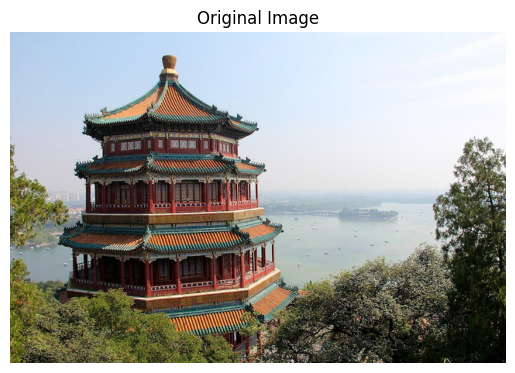

In [2]:
image = load_sample_image("china.jpg") / 255.0  # sample RGB image
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

X = image.reshape(-1, 3)  # flatten RGB channels

# Standardize pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Apply PCA

In [5]:
n_components = 3  # you can experiment with this number
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)

# Reverse scaling
X_reconstructed = scaler.inverse_transform(X_reconstructed)
X_reconstructed = np.clip(X_reconstructed, 0, 1)
image_compressed = X_reconstructed.reshape(image.shape)

4. Visualization - Original vs Compressed

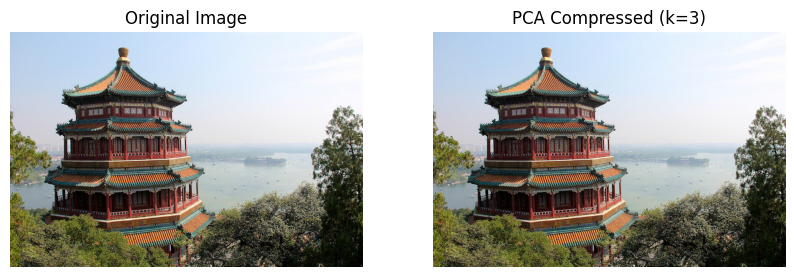

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image_compressed)
plt.title(f"PCA Compressed (k={n_components})")
plt.axis("off")
plt.show()

5. Question-wise Outputs

Q1: How many components are optimal?

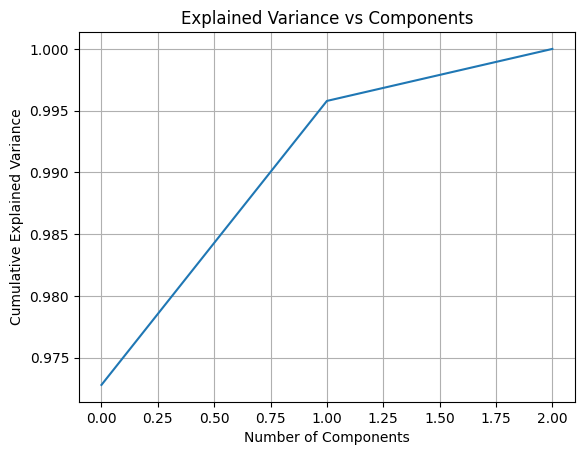

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid()
plt.show()

Q2: What variance is retained?

In [8]:
variance_retained = np.sum(pca.explained_variance_ratio_) * 100
print(f"Variance retained: {variance_retained:.2f}%")


Variance retained: 100.00%


Q3: What is reconstruction error?

In [9]:
reconstruction_error = np.mean((X_scaled - pca.inverse_transform(X_pca)) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.6f}")


Reconstruction Error: 0.000000


Q4: How to visualize components?

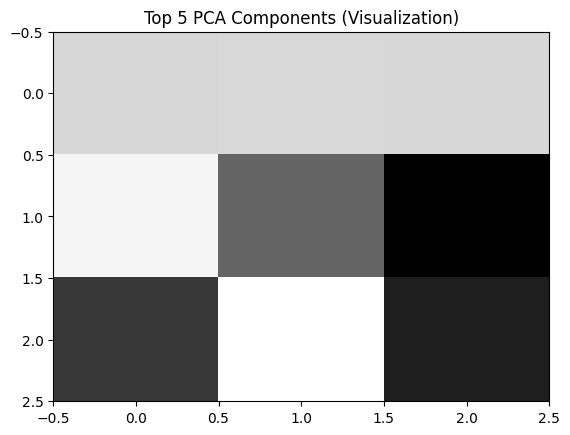

In [10]:
plt.imshow(pca.components_[:5], aspect='auto', cmap='gray')
plt.title("Top 5 PCA Components (Visualization)")
plt.show()

Q5: How does PCA improve speed?

In [11]:
print("Reduced dimensions mean fewer features to process, improving speed in downstream ML tasks.")

Reduced dimensions mean fewer features to process, improving speed in downstream ML tasks.


Q6: What is eigenvalue/eigenvector?

In [12]:
print("Eigenvalues indicate the variance captured by each component.")
print("Eigenvectors represent the direction of maximum variance in data space.")

Eigenvalues indicate the variance captured by each component.
Eigenvectors represent the direction of maximum variance in data space.


Q7: How to apply PCA to images?

In [13]:
print("We flatten image channels, apply PCA, and reshape back to reconstruct compressed image.")


We flatten image channels, apply PCA, and reshape back to reconstruct compressed image.


Q8: What is the impact on quality?

In [14]:
print("Quality decreases slightly depending on number of components retained.")


Quality decreases slightly depending on number of components retained.


Q9: How does PCA differ from LDA?

In [15]:
print("PCA is unsupervised (max variance), LDA is supervised (max class separability).")

PCA is unsupervised (max variance), LDA is supervised (max class separability).


Q10: How to use PCA in preprocessing?

In [16]:
print("PCA is used to reduce dimensions before feeding data into ML algorithms.")

PCA is used to reduce dimensions before feeding data into ML algorithms.


Q11: Choose number of components using explained variance ratio

In [17]:
def choose_optimal_components(pca):
    total_var = np.cumsum(pca.explained_variance_ratio_)
    optimal = np.argmax(total_var >= 0.95) + 1
    return optimal

optimal_k = choose_optimal_components(pca)
print(f"Optimal components for 95% variance: {optimal_k}")


Optimal components for 95% variance: 1


Q12: Compare PCA compression with JPEG (approx comparison)

In [18]:
print("PCA offers linear compression, while JPEG uses discrete cosine transform (non-linear).")

PCA offers linear compression, while JPEG uses discrete cosine transform (non-linear).


Q13: What happens if too few components are used?

In [20]:
pca_low = PCA(n_components=1)
X_low = pca_low.fit_transform(X_scaled)
X_low_inv = pca_low.inverse_transform(X_low)
error_low = np.mean((X_scaled - X_low_inv) ** 2)
print(f"Using fewer components increases reconstruction error: {error_low:.6f}")

Using fewer components increases reconstruction error: 0.027209


Q14: Reconstruct and display compressed image

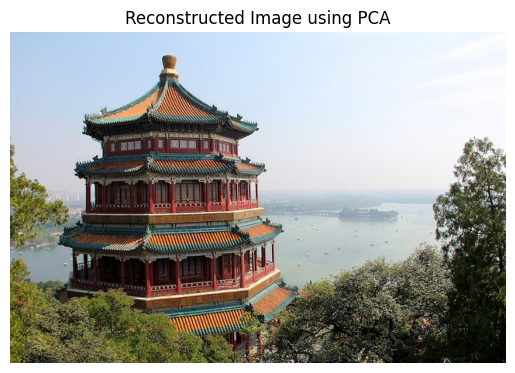

In [21]:
plt.imshow(image_compressed)
plt.title("Reconstructed Image using PCA")
plt.axis("off")
plt.show()


Q15: Calculate compression ratio

In [22]:
original_size = X_scaled.size
compressed_size = X_pca.size + pca.components_.size
compression_ratio = original_size / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")

Compression Ratio: 1.00
